In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("CompleteDataSet.csv",low_memory=False,skiprows=[1])
df.columns

Index(['TimeStamps', 'AnkleAccelerometer', 'Unnamed: 2', 'Unnamed: 3',
       'AnkleAngularVelocity', 'Unnamed: 5', 'Unnamed: 6', 'AnkleLuminosity',
       'RightPocketAccelerometer', 'Unnamed: 9', 'Unnamed: 10',
       'RightPocketAngularVelocity', 'Unnamed: 12', 'Unnamed: 13',
       'RightPocketLuminosity', 'BeltAccelerometer', 'Unnamed: 16',
       'Unnamed: 17', 'BeltAngularVelocity', 'Unnamed: 19', 'Unnamed: 20',
       'BeltLuminosity', 'NeckAccelerometer', 'Unnamed: 23', 'Unnamed: 24',
       'NeckAngularVelocity', 'Unnamed: 26', 'Unnamed: 27', 'NeckLuminosity',
       'WristAccelerometer', 'Unnamed: 30', 'Unnamed: 31',
       'WristAngularVelocity', 'Unnamed: 33', 'Unnamed: 34', 'WristLuminosity',
       'BrainSensor', 'Infrared1', 'Infrared2', 'Infrared3', 'Infrared4',
       'Infrared5', 'Infrared6', 'Subject', 'Activity', 'Trial', 'Tag'],
      dtype='object')

In [6]:
data=df[['AnkleAccelerometer', 'Unnamed: 2', 'Unnamed: 3',
       'AnkleAngularVelocity', 'Unnamed: 5', 'Unnamed: 6','Activity']]

In [7]:
data["AnkleAccelerometer"]=data["AnkleAccelerometer"].astype("float")
data["Unnamed: 2"]=data["Unnamed: 2"].astype("float")
data["Unnamed: 3"]=data["Unnamed: 3"].astype("float")
data["AnkleAngularVelocity"]=data["AnkleAngularVelocity"].astype("float")
data["Unnamed: 5"]=data["Unnamed: 5"].astype("float")
data["Unnamed: 6"]=data["Unnamed: 6"].astype("float")


data["Activity"]=data["Activity"].astype("float")

C:\Users\Rupali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rupali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rupali\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [8]:
Walking=data[data["Activity"]==6].head(8872)
Standing=data[data["Activity"]==7].head(8872)
Sitting=data[data["Activity"]==8].head(8872)
Laying=data[data["Activity"]==11].head(8872)
Jumping=data[data["Activity"]==10].head(8872)
Falling_sideways=data[data["Activity"]==4].head(8872)
Falling_backwards=data[data["Activity"]==3].head(8872)
Falling_forward_using_hands=data[data["Activity"]==1].head(8872)
Falling_forward_using_knees=data[data["Activity"]==2].head(8872)
Falling_sitting_in_empty_chair=data[data["Activity"]==5].head(8872)
Picking_up_an_object=data[data["Activity"]==9].head(8872)

In [9]:
bal_data=pd.DataFrame()
bal_data=bal_data.append([Walking,Standing,Sitting,Laying,Jumping,Falling_sideways,Falling_backwards,
                          Falling_forward_using_hands,Falling_forward_using_knees,Falling_sitting_in_empty_chair,
                          Picking_up_an_object])
print(bal_data["Activity"].value_counts())
np.shape(bal_data)

7.0     8872
5.0     8872
9.0     8872
4.0     8872
11.0    8872
3.0     8872
10.0    8872
2.0     8872
1.0     8872
8.0     8872
6.0     8872
Name: Activity, dtype: int64


(97592, 7)

In [10]:
x=bal_data[['AnkleAccelerometer', 'Unnamed: 2', 'Unnamed: 3',
       'AnkleAngularVelocity', 'Unnamed: 5', 'Unnamed: 6']]
y=bal_data["Activity"]

In [11]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
bal_data['label'] = label.fit_transform(bal_data['Activity'])
bal_data.head()

,AnkleAccelerometer,Unnamed: 2,Unnamed: 3,AnkleAngularVelocity,Unnamed: 5,Unnamed: 6,Activity,label
2832,-1.398,0.154,-0.100,10.854,10.000,-99.146,6.0,5
2833,-1.398,0.154,-0.100,20.793,19.756,-137.622,6.0,5
2834,-2.010,0.659,-0.078,40.915,37.134,-190.488,6.0,5
2835,-2.010,0.659,-0.078,115.549,29.085,-253.720,6.0,5
2836,-1.099,-0.044,-0.790,-51.098,5.732,-147.805,6.0,5


In [12]:
x=bal_data[['AnkleAccelerometer', 'Unnamed: 2', 'Unnamed: 3',
       'AnkleAngularVelocity', 'Unnamed: 5', 'Unnamed: 6']]
y=bal_data["label"]

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X = scaler.fit_transform(x)

X = pd.DataFrame(data = X, columns = ['AnkleAccelerometer', 'Unnamed: 2', 'Unnamed: 3',
       'AnkleAngularVelocity', 'Unnamed: 5', 'Unnamed: 6'])


X

,AnkleAccelerometer,Unnamed: 2,Unnamed: 3,AnkleAngularVelocity,Unnamed: 5,Unnamed: 6
0,-1.392580,0.113115,0.137171,0.336491,0.256448,-1.512785
1,-1.392580,0.113115,0.137171,0.584950,0.523091,-2.100511
2,-2.354521,0.971511,0.185314,1.087969,0.998052,-2.908045
3,-2.354521,0.971511,0.185314,2.953702,0.778063,-3.873921
4,-0.922612,-0.223444,-1.372748,-1.212213,0.139799,-2.256057
...,...,...,...,...,...,...
97587,2.323152,-0.078961,0.555135,0.039234,0.003143,0.001681
97588,2.324724,-0.078961,0.557323,0.040759,0.003143,0.004477
97589,2.321581,-0.080661,0.557323,0.045334,0.001476,0.004477
97590,2.321581,-0.080661,0.557323,0.048384,0.003143,0.004477


In [14]:
from sklearn import svm
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [15]:
X_train.shape,y_train.shape

((68314, 6), (68314,))

In [16]:
X_test.shape,y_test.shape

((29278, 6), (29278,))

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
knn=KNeighborsClassifier(n_neighbors=5)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
accuracy_train=accuracy_score(y_train,knn.predict(X_train))

In [21]:
accuracy_test=accuracy_score(y_test,knn.predict(X_test))

In [22]:
print(accuracy_test)
print(accuracy_train)

0.8418266275018785
0.8910911379805018


In [23]:
y_pred=knn.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[2011,  195,   84,   44,   49,   68,   50,    7,   61,   87,    6],
       [ 239, 2033,   85,   47,   47,   47,   19,   10,   43,   75,   17],
       [ 151,  133, 1952,   65,  122,   29,   25,   31,   62,   83,    8],
       [  77,   59,   62, 2223,   51,   32,   22,   19,   56,   38,   23],
       [  91,   67,  172,   74, 1941,   57,   40,   40,   76,   72,   31],
       [  24,   22,   10,    5,    5, 2506,   22,    8,   16,   44,    0],
       [  10,    9,    9,    5,    9,   11, 2495,   23,   89,    2,    0],
       [   7,    7,   23,   12,   20,   20,   41, 2505,   23,    4,    0],
       [  51,   36,   61,   34,   74,   65,  193,   34, 2104,   10,    0],
       [  60,   46,   64,   20,   48,   76,   11,    3,   51, 2282,    0],
       [  18,    6,   10,   19,    8,    4,    0,    0,    0,    1, 2595]],
      dtype=int64)

In [25]:
m=cm/cm.sum(axis=1)
cm=np.around(m,3)

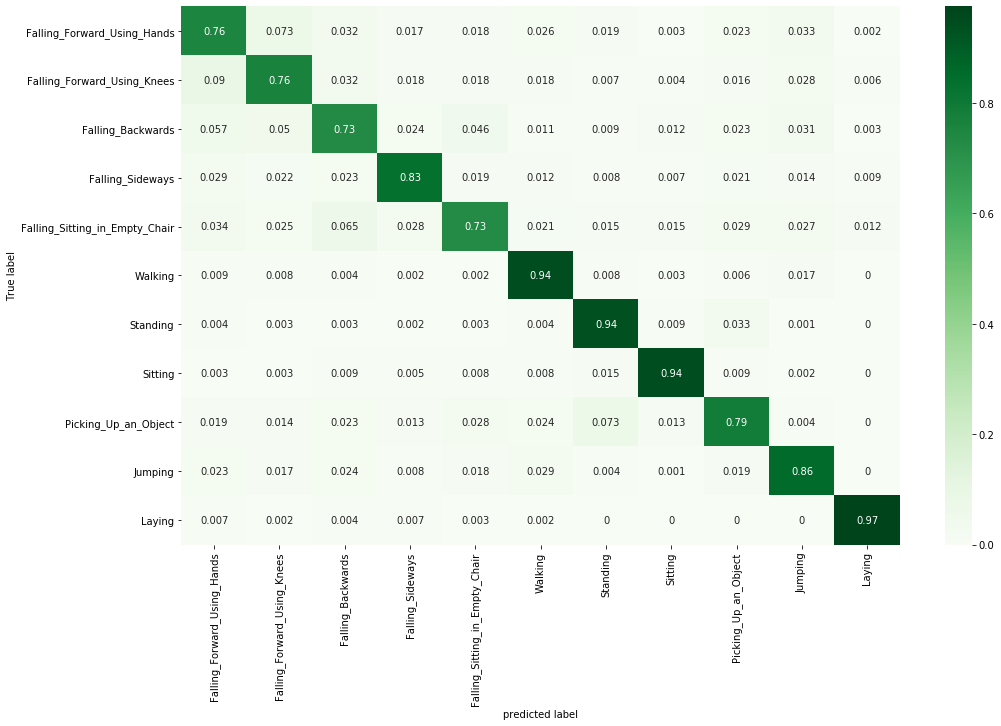

In [26]:
import seaborn as sns
axis_labels = ['Falling_Forward_Using_Hands','Falling_Forward_Using_Knees','Falling_Backwards','Falling_Sideways','Falling_Sitting_in_Empty_Chair','Walking','Standing','Sitting','Picking_Up_an_Object','Jumping','Laying']
figure = plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap=plt.cm.Greens, xticklabels=axis_labels, yticklabels=axis_labels)
plt.ylim(len(cm),0,0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('predicted label')
plt.show()